In [ ]:
!pip install pyreadr

     |████████████████████████████████| 361 kB 5.2 MB/s 
     |████████████████████████████████| 11.3 MB 40.8 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


In [ ]:
import pyreadr
import pandas as pd

result = pyreadr.read_r('acc_running.rda')
print(result.keys()) 
acc_running = result["acc_running"] 
acc_running

odict_keys(['acc_running'])


,loc_id,date_time,x,y,z
0,left_hip,2018-10-25 17:57:30.000000000,-0.199,-1.012,0.133
1,left_hip,2018-10-25 17:57:30.009999872,-0.191,-1.027,0.133
2,left_hip,2018-10-25 17:57:30.020000000,-0.191,-1.035,0.121
3,left_hip,2018-10-25 17:57:30.029999872,-0.191,-1.027,0.109
4,left_hip,2018-10-25 17:57:30.040000000,-0.191,-1.016,0.109
...,...,...,...,...,...
299995,left_ankle,2018-10-25 18:22:29.950000128,0.109,-1.012,0.098
299996,left_ankle,2018-10-25 18:22:29.960000000,0.109,-1.008,0.098
299997,left_ankle,2018-10-25 18:22:29.970000128,0.105,-1.004,0.102
299998,left_ankle,2018-10-25 18:22:29.980000000,0.109,-1.008,0.105


In [ ]:
result = pyreadr.read_r('acc_walking_IU.rda')

# done! let's see what we got
print(result.keys()) # let's check what objects we got
acc_walking_IU = result["acc_walking_IU"]
acc_walking_IU

odict_keys(['acc_walking_IU'])


,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
result = pyreadr.read_r('stride_template.rda')
print(result.keys())
stride_template = result

odict_keys([])


In [ ]:
import pandas as pd
dataframe = pd.concat([acc_running,acc_walking_IU])
dataframe

,loc_id,date_time,x,y,z,subj_id,time_s
0,left_hip,2018-10-25 17:57:30.000000000,-0.199,-1.012,0.133,NaN,NaN
1,left_hip,2018-10-25 17:57:30.009999872,-0.191,-1.027,0.133,NaN,NaN
2,left_hip,2018-10-25 17:57:30.020000000,-0.191,-1.035,0.121,NaN,NaN
3,left_hip,2018-10-25 17:57:30.029999872,-0.191,-1.027,0.109,NaN,NaN
4,left_hip,2018-10-25 17:57:30.040000000,-0.191,-1.016,0.109,NaN,NaN
...,...,...,...,...,...,...,...
2590443,right_ankle,NaT,0.098,1.059,0.090,idff99de96,206.71
2590444,right_ankle,NaT,0.105,1.070,0.074,idff99de96,206.72
2590445,right_ankle,NaT,0.125,1.094,0.090,idff99de96,206.73
2590446,right_ankle,NaT,0.141,1.129,0.090,idff99de96,206.74


In [ ]:
acc_walking_IU

,subj_id,loc_id,time_s,x,y,z
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160
...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.signal import find_peaks
import warnings
warnings.filterwarnings('ignore')

In [ ]:
acc_walking_IU = acc_walking_IU.dropna()
acc_walking_IU.shape

(2590448, 6)

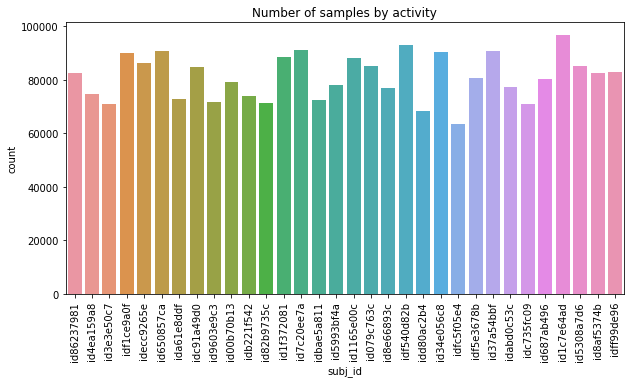

In [ ]:
sns.set_style()
plt.figure(figsize = (10, 5))
sns.countplot(x = 'subj_id', data = acc_walking_IU)
plt.title("Number of samples by activity")
plt.xticks(rotation=90)
plt.show()

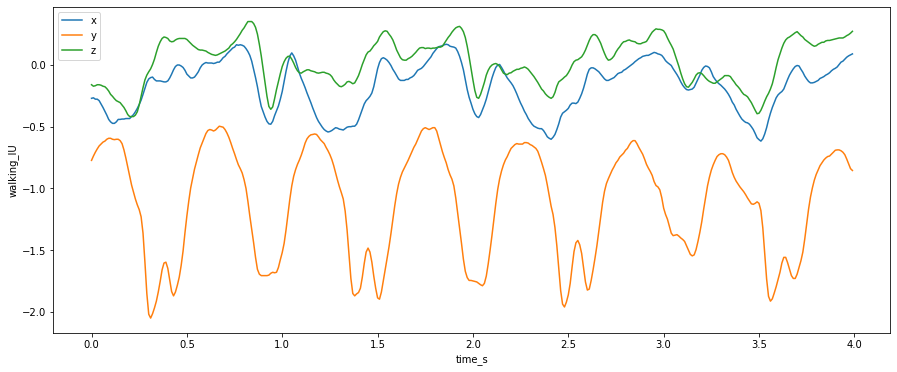

In [ ]:
plt.figure(figsize = (15, 6))
data_36 = acc_walking_IU[(acc_walking_IU['subj_id'] == 'id86237981') ][:400]
sns.lineplot(y = 'x', x = 'time_s', data = data_36)
sns.lineplot(y = 'y', x = 'time_s', data = data_36)
sns.lineplot(y = 'z', x = 'time_s', data = data_36)
plt.legend(['x', 'y', 'z'])
plt.ylabel('walking_IU')
# plt.title(i, fontsize = 15)
plt.show()

In [ ]:
import numpy as np
acc_walking_IU['magnitude'] = np.sqrt(acc_walking_IU['x']**2+acc_walking_IU['y']**2+acc_walking_IU['z']**2)
acc_walking_IU

,subj_id,loc_id,time_s,x,y,z,magnitude
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160,0.834284
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172,0.803109
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168,0.777690
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160,0.751485
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160,0.734477
...,...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090,1.067326
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074,1.077683
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090,1.104790
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090,1.141325


In [ ]:
acc_walking_IU.subj_id.unique()

array(['id86237981', 'id4ea159a8', 'id3e3e50c7', 'idf1ce9a0f',
       'idecc9265e', 'id650857ca', 'ida61e8ddf', 'idc91a49d0',
       'id9603e9c3', 'id00b70b13', 'idb221f542', 'id82b9735c',
       'id1f372081', 'id7c20ee7a', 'idbae5a811', 'id5993bf4a',
       'id1165e00c', 'id079c763c', 'id8e66893c', 'idf540d82b',
       'idd80ac2b4', 'id34e056c8', 'idfc5f05e4', 'idf5e3678b',
       'id37a54bbf', 'idabd0c53c', 'idc735fc09', 'id687ab496',
       'id1c7e64ad', 'id5308a7d6', 'id8af5374b', 'idff99de96'],
      dtype=object)

In [ ]:
appended_data = []
df = []

for k in acc_walking_IU.subj_id.unique():
    data_1 = acc_walking_IU[(acc_walking_IU['subj_id'] == k) ]

    x = data_1['magnitude'].values

    peaks2, _ = find_peaks(x, prominence=0.5) 
    initial = np.zeros(shape = len(x))

    start = peaks2[0]

    for index,each in enumerate(peaks2):
      
      if(index %2 != 0):
        initial[start:each] = 1
      start = each

    data_1["label"] = initial
    df.append(data_1)

appended_data = pd.concat(df)

appended_data

,subj_id,loc_id,time_s,x,y,z,magnitude,label
0,id86237981,left_wrist,0.00,-0.270,-0.773,-0.160,0.834284,0.0
1,id86237981,left_wrist,0.01,-0.266,-0.738,-0.172,0.803109,0.0
2,id86237981,left_wrist,0.02,-0.277,-0.707,-0.168,0.777690,0.0
3,id86237981,left_wrist,0.03,-0.277,-0.680,-0.160,0.751485,0.0
4,id86237981,left_wrist,0.04,-0.289,-0.656,-0.160,0.734477,0.0
...,...,...,...,...,...,...,...,...
2590443,idff99de96,right_ankle,206.71,0.098,1.059,0.090,1.067326,0.0
2590444,idff99de96,right_ankle,206.72,0.105,1.070,0.074,1.077683,0.0
2590445,idff99de96,right_ankle,206.73,0.125,1.094,0.090,1.104790,0.0
2590446,idff99de96,right_ankle,206.74,0.141,1.129,0.090,1.141325,0.0


In [ ]:
appended_data[28:50]

,subj_id,loc_id,time_s,x,y,z,magnitude,label
28,id86237981,left_wrist,0.28,-0.188,-1.598,-0.121,1.613564,0.0
29,id86237981,left_wrist,0.29,-0.141,-1.852,-0.082,1.859169,0.0
30,id86237981,left_wrist,0.30,-0.113,-2.020,-0.055,2.023906,0.0
31,id86237981,left_wrist,0.31,-0.102,-2.051,-0.031,2.053769,1.0
32,id86237981,left_wrist,0.32,-0.098,-2.016,0.004,2.018385,1.0
33,id86237981,left_wrist,0.33,-0.117,-1.969,0.047,1.973033,1.0
34,id86237981,left_wrist,0.34,-0.129,-1.914,0.102,1.921052,1.0
35,id86237981,left_wrist,0.35,-0.129,-1.840,0.152,1.850769,1.0
36,id86237981,left_wrist,0.36,-0.129,-1.754,0.188,1.768757,1.0
37,id86237981,left_wrist,0.37,-0.133,-1.660,0.215,1.679141,1.0


In [ ]:
appended_data.to_csv("FinalDatasetWithlabels.csv")

In [ ]:
plt.figure(figsize = (15, 6))
data_36 = acc_walking_IU[(acc_walking_IU['subj_id'] == 'id86237981') ]
# sns.lineplot(y = 'magnitude', x = 'time_s', data = data_36)
# plt.legend(['magnitude'])
# plt.ylabel('walking_IU')
# plt.show()

<Figure size 1080x432 with 0 Axes>

In [ ]:
len(data_36)

1000

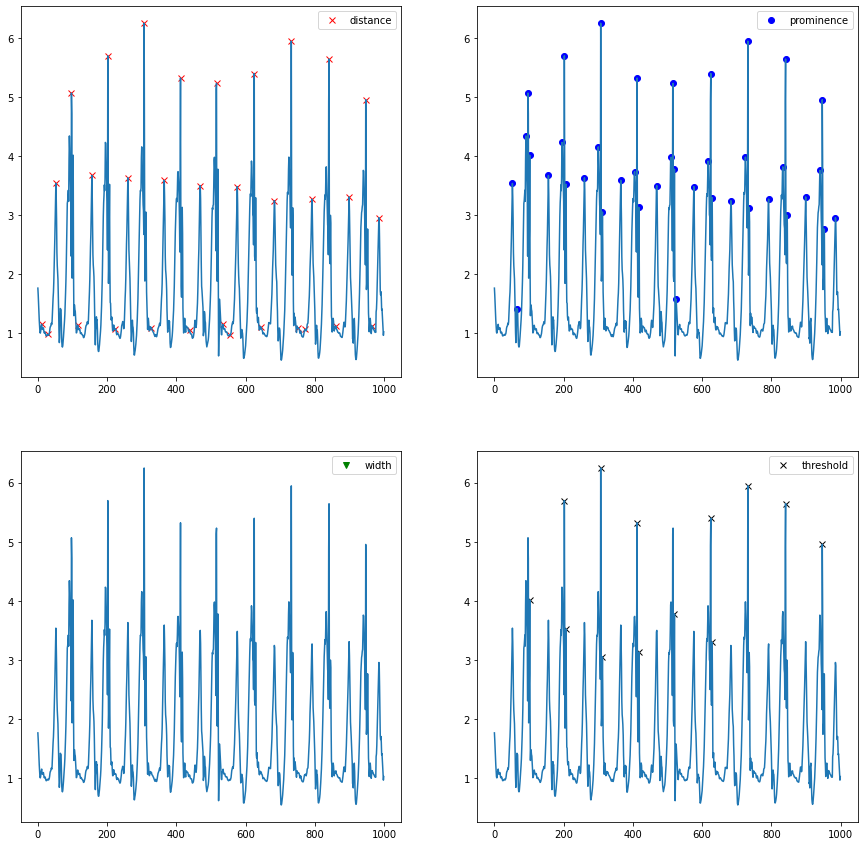

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy.signal import find_peaks

f, axs = plt.subplots(2,2,figsize=(15,15))

x = data_36['magnitude'].values
peaks, _ = find_peaks(x, distance=18)
peaks2, _ = find_peaks(x, prominence=0.5)      # BEST!
peaks3, _ = find_peaks(x, width=18)
peaks4, _ = find_peaks(x, threshold=0.4)     # Required vertical distance to its direct neighbouring samples, pretty useless

plt.subplot(2, 2, 1)
plt.plot(peaks, x[peaks], "xr"); plt.plot(x); plt.legend(['distance'])

plt.subplot(2, 2, 2)
plt.plot(peaks2, x[peaks2], "ob"); plt.plot(x); plt.legend(['prominence'])

plt.subplot(2, 2, 3)
plt.plot(peaks3, x[peaks3], "vg"); plt.plot(x); plt.legend(['width'])

plt.subplot(2, 2, 4)
plt.plot(peaks4, x[peaks4], "xk"); plt.plot(x); plt.legend(['threshold'])

plt.show()

In [ ]:
x = data_36['magnitude'].values
peaks2, _ = find_peaks(x, prominence=0.5)
peaks2

39

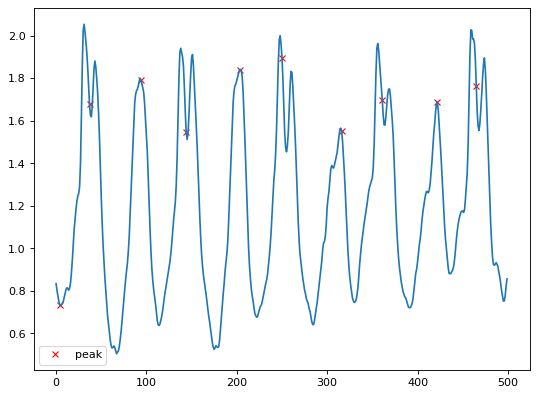

In [ ]:
from scipy import signal
from matplotlib.pyplot import figure
xs = np.arange(0, np.pi, 0.05)
data = data_36['magnitude'].values
# peakind = signal.find_peaks_cwt(data, np.arange(1,10))
peakind = signal.find_peaks_cwt(data, widths = np.arange(1,30) )  
figure(figsize=(8, 6), dpi=80)
plt.plot(peakind, x[peakind], "xr"); plt.plot(x); plt.legend(['peak'])
plt.show()